In [3]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Read File
df=pd.read_csv('QualityPrediction.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
#Statistical description of data
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
##Checking for null values
df.isnull().sum() 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Correlation between different featurs

<AxesSubplot:>

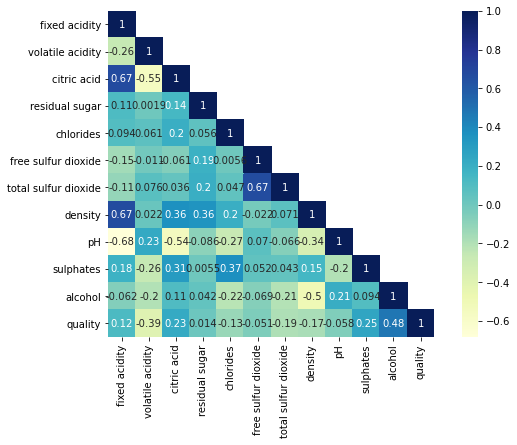

In [7]:
plt.figure(figsize=(10,6))
correlation= df.corr()
mask = np.array(correlation)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
sns.heatmap(data=correlation,mask=mask,square=True,annot=True,cbar=True,cmap="YlGnBu")


In [8]:
corr_matrix = df.corr()
print(corr_matrix["quality"].sort_values(ascending=False))

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


Most affecting Factors : Alcohol , Volatile acidity, Sulphates and Critic Acid Least affecting Factors :Fixed Acidity, Residual sugar, Free Sulphur Dioxide , pH, Chlorides,density and total sulfur dioxide.

# Visualization of data

[Text(0.5, 0, 'Quality'),
 Text(0, 0.5, 'Alcohol'),
 Text(0.5, 1.0, 'Alcohol percent in different wine quality types')]

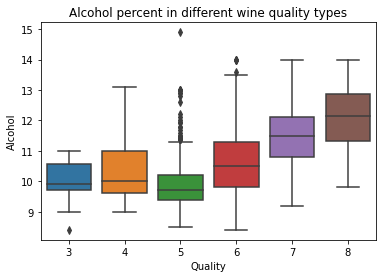

In [9]:
bx = sns.boxplot(x="quality", y='alcohol', data =df)
bx.set(xlabel='Quality', ylabel='Alcohol', title='Alcohol percent in different wine quality types')

Quality directly proportional with alcohol. That's mean wine drinker prefer high level alcohol in the wine

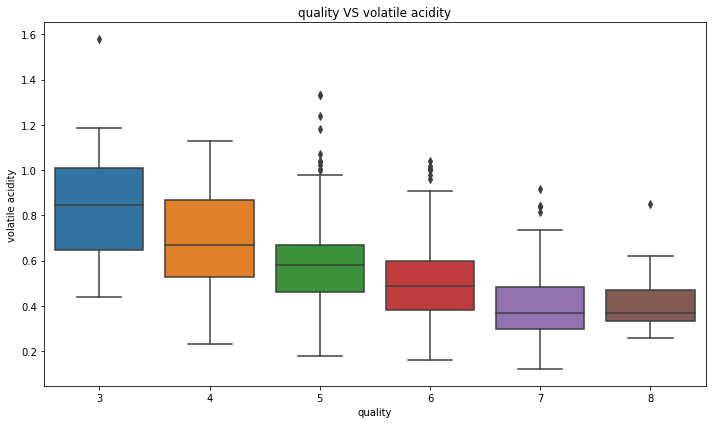

In [11]:
fig, axs = plt.subplots(figsize=(10,6))

bx = sns.boxplot(x="quality", y='volatile acidity', data =df)
plt.title('quality VS volatile acidity')
plt.tight_layout()
plt.show()

Higher quality wine contain low level of volatile acidity.That's mean quality inversely proportional with the volatile acidity.

[Text(0.5, 0, 'Wine Ratings'),
 Text(0, 0.5, 'Sulphates'),
 Text(0.5, 1.0, 'Sulphates in different types of Wine ratings')]

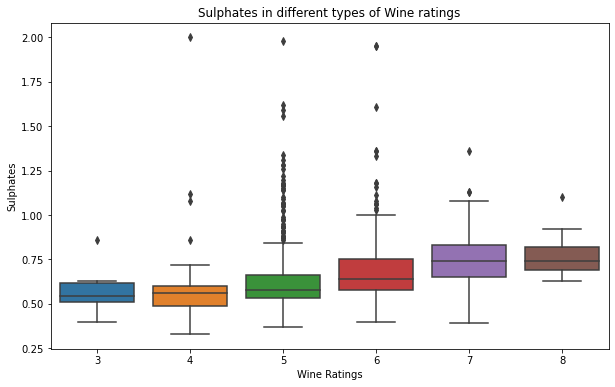

In [12]:
plt.figure(figsize=(10,6))
bx = sns.boxplot(x="quality", y='sulphates', data=df)
bx.set(xlabel='Wine Ratings', ylabel='Sulphates', title='Sulphates in different types of Wine ratings')

[Text(0.5, 0, 'Wine Ratings'),
 Text(0, 0.5, 'Citric Acid'),
 Text(0.5, 1.0, 'citric acid in different types of Wine ratings')]

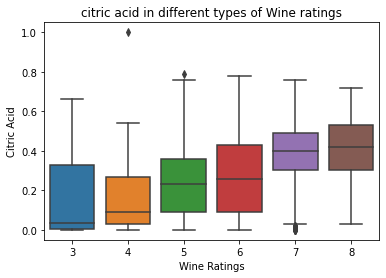

In [13]:
bx = sns.boxplot(x="quality", y='citric acid', data = df)
bx.set(xlabel='Wine Ratings', ylabel='Citric Acid', title='citric acid in different types of Wine ratings')

<AxesSubplot:>

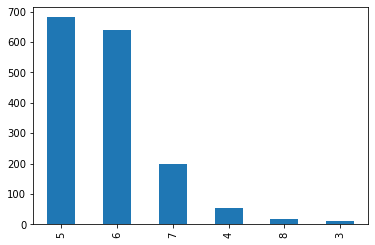

In [14]:
#bar plot of quality from white wine
df['quality'].value_counts().plot.bar()

In [15]:
df.groupby('quality').count()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,10,10,10,10,10,10,10,10,10,10,10
4,53,53,53,53,53,53,53,53,53,53,53
5,681,681,681,681,681,681,681,681,681,681,681
6,638,638,638,638,638,638,638,638,638,638,638
7,199,199,199,199,199,199,199,199,199,199,199
8,18,18,18,18,18,18,18,18,18,18,18


In [16]:
X=df.drop('quality',axis=1)
y=df['quality']

In [17]:
from imblearn.over_sampling import SMOTE

#As there in imbalance with quality attribute, so i have decided oversample the minority classes
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [18]:
y.value_counts()

4    681
6    681
8    681
3    681
5    681
7    681
Name: quality, dtype: int64

In [19]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [20]:
model.feature_importances_

array([0.02830029, 0.29936941, 0.0647773 , 0.02357683, 0.04863502,
       0.03618343, 0.04400555, 0.04061097, 0.03670731, 0.09882407,
       0.27900984])

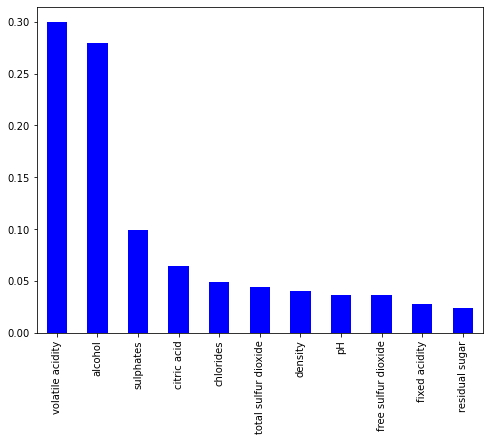

In [21]:
#Impotantance feature
plt.figure(figsize=(8,6))
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(11).plot(kind='bar', color='blue')
plt.show()

In [22]:
X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=0.7, random_state=12)

<AxesSubplot:>

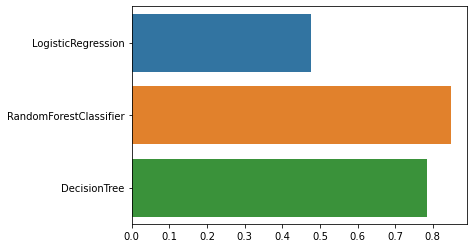

In [24]:
Accuracy = [ ]

classifiers=[LogisticRegression(),
             RandomForestClassifier(random_state=14),DecisionTreeClassifier(random_state=42),]
classifiers_names=['LogisticRegression','RandomForestClassifier','DecisionTree']

result={}

for classifier  in range(len(classifiers)):
    c=classifiers[classifier]
    c.fit(X_train,y_train)
    y_predict=c.predict(X_test)
    Accuracy.append(accuracy_score(y_predict,y_test))
     
result={'Classifiers':classifiers_names,'Accuracy':Accuracy}
sns.barplot(y='Classifiers',x='Accuracy',data=result)

RandomForestClassifier has more accuracy on target variable when compared to other models.

In [25]:
#Re-bulid the  RandomForestClassifier

rfc=RandomForestClassifier(random_state=14)

In [26]:
rfc.set_params(n_estimators=500, max_depth= 50, max_features= 'auto')

RandomForestClassifier(max_depth=50, max_features='auto', n_estimators=500,
                       random_state=14)

In [27]:
rfc.fit(X_train,y_train)

y_pred =rfc.predict(X_test)

In [31]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve, auc

In [32]:
print('Accuracy_Score :',accuracy_score(y_test,y_pred))
print('Classification_report:\n',classification_report(y_test,y_pred))

Accuracy_Score : 0.8499184339314845
Classification_report:
               precision    recall  f1-score   support

           3       0.99      1.00      0.99       215
           4       0.86      0.97      0.92       199
           5       0.79      0.68      0.73       228
           6       0.65      0.57      0.61       201
           7       0.82      0.91      0.86       184
           8       0.96      0.98      0.97       199

    accuracy                           0.85      1226
   macro avg       0.84      0.85      0.85      1226
weighted avg       0.84      0.85      0.84      1226



In [34]:
confusion_matrix(y_test,y_pred)

array([[215,   0,   0,   0,   0,   0],
       [  0, 194,   4,   1,   0,   0],
       [  3,  15, 155,  51,   4,   0],
       [  0,  16,  38, 115,  30,   2],
       [  0,   0,   0,  11, 167,   6],
       [  0,   0,   0,   0,   3, 196]], dtype=int64)